In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.timeseries import LombScargle

from constants import RAW_DIR
from src.model import Asteroid, Lightcurve

sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [2]:
# Periods in hours
AVAILABLE_ASTEROIDS = {
    "Eros": {"id": 433, "period": 5.2702553},
    "Pallas": {"id": 2, "period": 7.81323},
}

In [3]:
asteroid_name = "Eros"
chosen_asteroid = AVAILABLE_ASTEROIDS[asteroid_name]
asteroid_id, known_period = chosen_asteroid["id"], chosen_asteroid["period"]

with open(RAW_DIR / asteroid_name / "lc.json", "r") as f:
    raw_data = json.load(f)

In [4]:
raw_data[0]

{'LightCurve': {'id': '14537',
  'asteroid_id': '1714',
  'scale': '0',
  'filter': None,
  'points': '2433915.385708  1.021246e+00    -1.49250950  -0.20313009  -0.25692782   -0.49091309  -0.15648988  -0.25691486\n2433915.401167  1.018429e+00    -1.49243437  -0.20332590  -0.25693732   -0.49085471  -0.15642099  -0.25692433\n2433915.407583  1.030696e+00    -1.49240319  -0.20340717  -0.25694127   -0.49083050  -0.15639240  -0.25692825\n2433915.423333  1.025016e+00    -1.49232660  -0.20360666  -0.25695094   -0.49077108  -0.15632220  -0.25693789\n2433915.434000  1.008163e+00    -1.49227472  -0.20374176  -0.25695749   -0.49073086  -0.15627466  -0.25694442\n2433915.443625  9.897614e-01    -1.49222789  -0.20386366  -0.25696339   -0.49069459  -0.15623177  -0.25695030\n2433915.453542  9.469576e-01    -1.49217962  -0.20398927  -0.25696948   -0.49065723  -0.15618757  -0.25695637\n2433915.458333  9.211503e-01    -1.49215630  -0.20404995  -0.25697241   -0.49063919  -0.15616622  -0.25695929\n2433915.4

In [5]:
asteroid = Asteroid.from_lightcurves(
    id=asteroid_id,  # Where to get this id from?
    name=asteroid_name,
    period=known_period,
    data=raw_data
)
asteroid

Asteroid(id=433, name=Eros, period=5.2702553, lightcurves=118)

In [6]:
asteroid.longest_lightcurve

Lightcurve(id=14587, created_at=2019-03-08 10:57:09 scale=0, points_count=192)

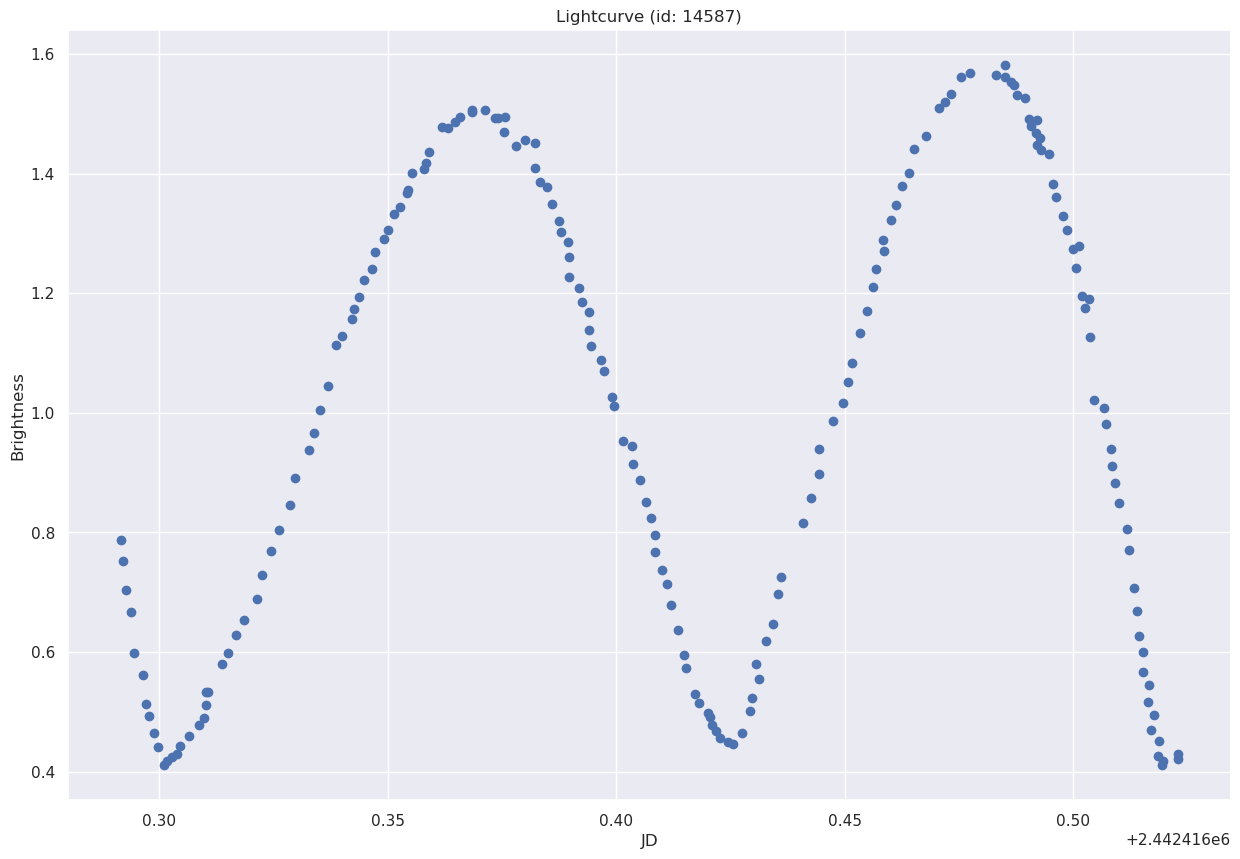

In [7]:
asteroid.longest_lightcurve.plot()

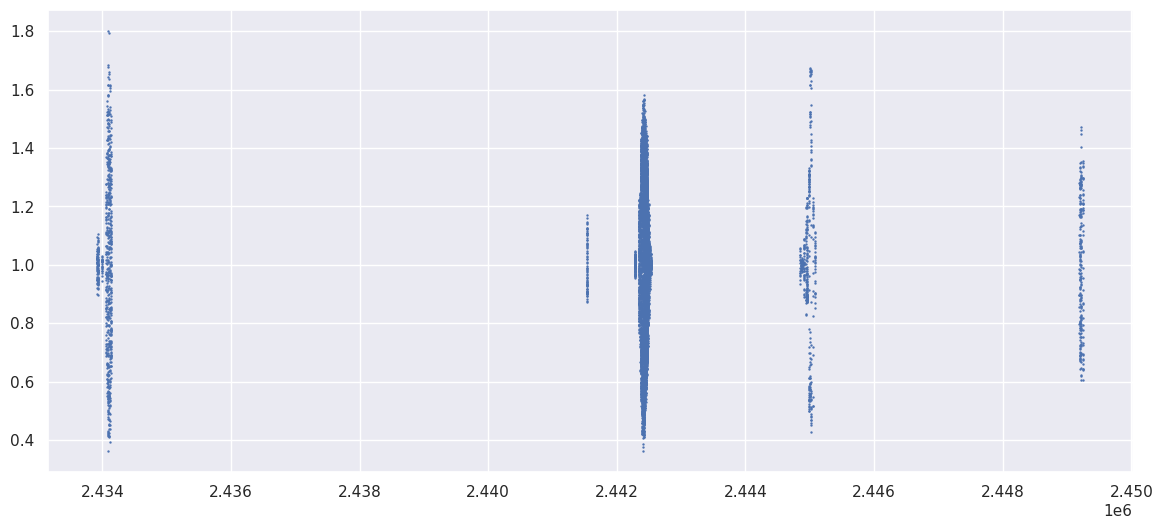

In [8]:
brightness = []
times = []
for lc in asteroid.lightcurves:
    for point in lc.points:
        brightness.append(point.brightness)
        times.append(point.JD)

plt.scatter(times, brightness, s=0.5)
plt.show()


In [107]:
MAX_DIFF_THRESHOLD = 40  # days
bins: list[list[Lightcurve]] = [[]]

curr_bin = 0
bin_start = None
for lc in asteroid.lightcurves:
    if bin_start is None:
        bin_start = lc.first_JD

    if lc.last_JD - bin_start > MAX_DIFF_THRESHOLD:
        curr_bin += 1
        bin_start = lc.first_JD
        bins.append([])

    bins[curr_bin].append(lc)

for ind, _bin in enumerate(bins):
    print(f"{ind:2} - {len(_bin)} lightcurves")

 0 - 4 lightcurves
 1 - 1 lightcurves
 2 - 10 lightcurves
 3 - 13 lightcurves
 4 - 1 lightcurves
 5 - 2 lightcurves
 6 - 11 lightcurves
 7 - 14 lightcurves
 8 - 23 lightcurves
 9 - 11 lightcurves
10 - 2 lightcurves
11 - 3 lightcurves
12 - 4 lightcurves
13 - 3 lightcurves
14 - 2 lightcurves
15 - 4 lightcurves
16 - 9 lightcurves
17 - 1 lightcurves


In [108]:
for _bin in bins:
    first = None
    for lc in _bin:
        if first is None:
            first = lc.first_JD

        print(f"{lc.first_JD:.2f} - {lc.last_JD:.2f} ({lc.last_JD - lc.first_JD:.2f})")
    
    print(lc.last_JD - first)
    print()

2433915.39 - 2433915.61 (0.22)
2433924.26 - 2433924.45 (0.19)
2433931.25 - 2433931.50 (0.25)
2433934.38 - 2433934.61 (0.23)
19.221791999880224

2433994.34 - 2433994.51 (0.17)
0.16674999985843897

2434054.24 - 2434054.43 (0.19)
2434055.29 - 2434055.40 (0.11)
2434068.32 - 2434068.47 (0.15)
2434078.28 - 2434078.40 (0.12)
2434079.29 - 2434079.40 (0.11)
2434085.31 - 2434085.45 (0.15)
2434086.28 - 2434086.42 (0.15)
2434088.30 - 2434088.41 (0.11)
2434090.36 - 2434090.45 (0.09)
2434091.31 - 2434091.47 (0.16)
37.226584000047296

2434098.33 - 2434098.47 (0.14)
2434100.30 - 2434100.45 (0.16)
2434104.30 - 2434104.43 (0.13)
2434105.33 - 2434105.43 (0.10)
2434117.35 - 2434117.41 (0.06)
2434119.33 - 2434119.45 (0.13)
2434120.32 - 2434120.43 (0.11)
2434121.32 - 2434121.45 (0.13)
2434128.33 - 2434128.41 (0.08)
2434129.31 - 2434129.41 (0.09)
2434130.33 - 2434130.40 (0.07)
2434132.34 - 2434132.41 (0.08)
2434135.34 - 2434135.42 (0.08)
37.0873329997994

2441533.85 - 2441534.11 (0.26)
0.26213400019332767

2

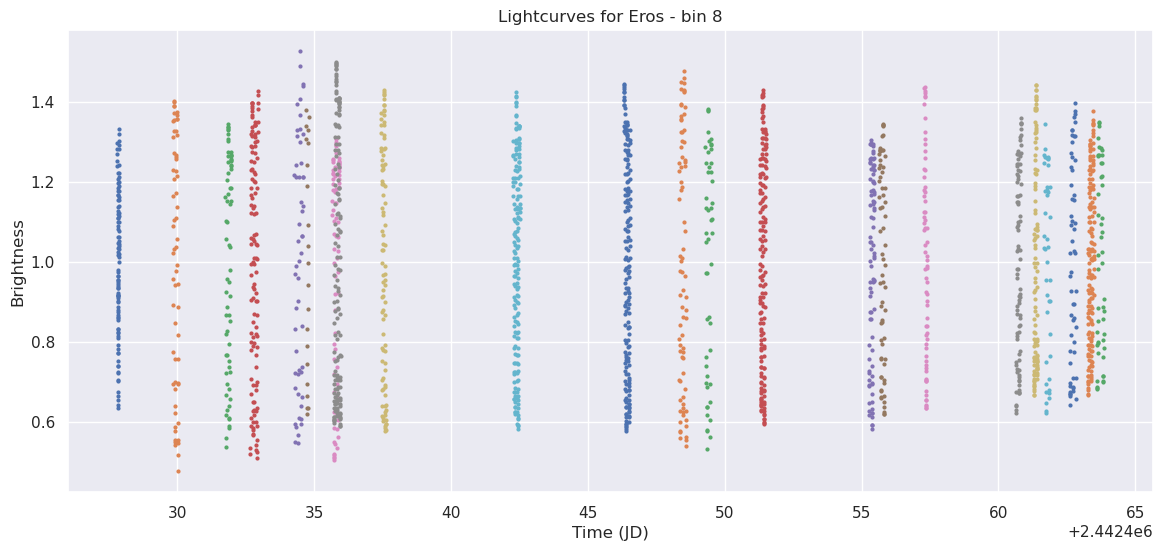

In [129]:
SELECTED_BIN = np.argmax([len(_bin) for _bin in bins])
selected_bin = bins[SELECTED_BIN]
for ind, lc in enumerate(selected_bin):
    times = []
    brightness = []
    for points in lc.points:
        times.append(points.JD)
        brightness.append(points.brightness)

    plt.scatter(times, brightness, s=4)

plt.title(f"Lightcurves for {asteroid_name} - bin {SELECTED_BIN}")
plt.xlabel("Time (JD)")
plt.ylabel("Brightness")
plt.show()

Best frequency: 9.002097882324845
Rotational period: 2.6660452167625017h


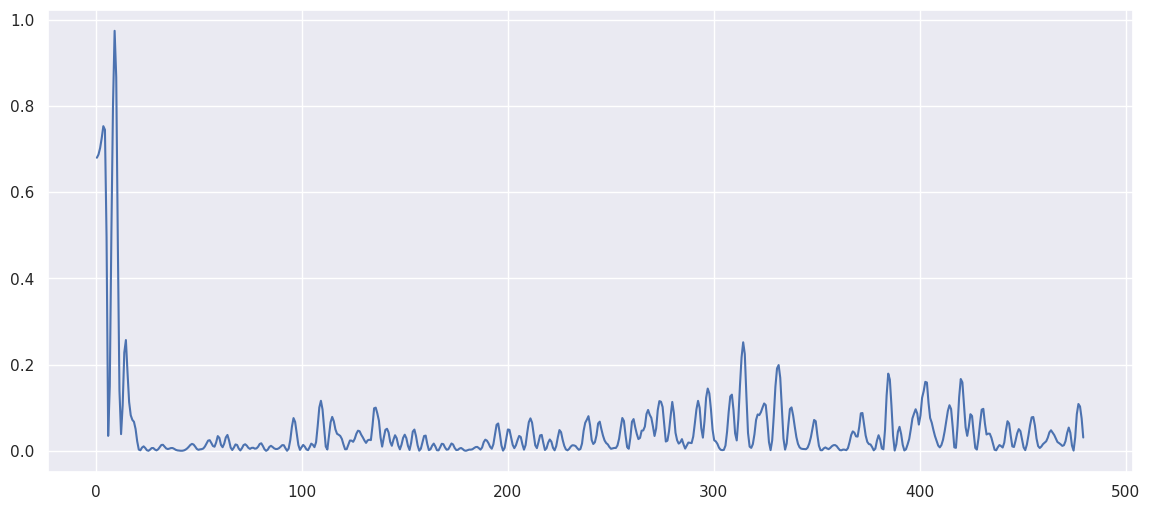

In [130]:
frequency, power = LombScargle(times, brightness).autopower()
_ = plt.plot(frequency, power)

best_frequency = frequency[np.argmax(power)]
best_period = 24 / best_frequency

print(f"Best frequency: {best_frequency}")
print(f"Rotational period: {best_period}h")

In [131]:
def get_phase(time: float, ref_time: float, period: float) -> float:
    return (time - ref_time) * 24 % period / period
    

In [132]:
known_period

5.2702553

In [133]:
known_period / 2

2.63512765

In [134]:
best_period * 2

5.3320904335250034

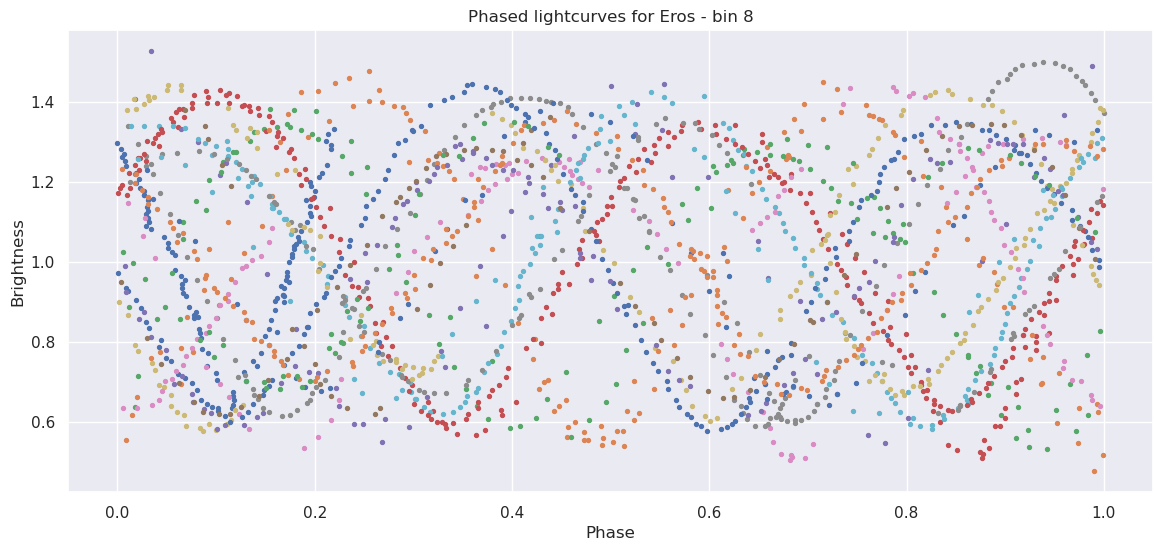

In [135]:
ref_JD = None
period = best_period * 2
for ind, lc in enumerate(selected_bin):
    if ref_JD is None:
        ref_JD = lc.first_JD

    phases = []
    brightness = []
    for point in lc.points:
        bias = 0
        # if ind != 1:
        #     bias = 0.08

        phase = get_phase(point.JD, ref_JD, period)
        if phase - bias < 0:
            phase += 1
        phase -= bias

        phases.append(phase)
        brightness.append(point.brightness)

    plt.scatter(phases, brightness, s=8, label=f"Lightcurve {lc.id}")

    # if ind == 1:
    #     break


plt.title(f"Phased lightcurves for {asteroid_name} - bin {SELECTED_BIN}")
plt.xlabel("Phase")
plt.ylabel("Brightness")
# plt.legend()
plt.show()